In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

sam_checkpoint = "/data/machine/nerfstudio/segment-anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=64,
    pred_iou_thresh=0.88,
    stability_score_thresh=0.95,
)

image = cv2.imread('/data/machine/data/flame_salmon_image/images/cam00_0001.jpg')
image = cv2.resize(image, (1024, 768))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
feature = np.load('/data/machine/nerfstudio/res.npy').transpose(2, 0, 1)
masks = mask_generator.generate(image, feature=feature)


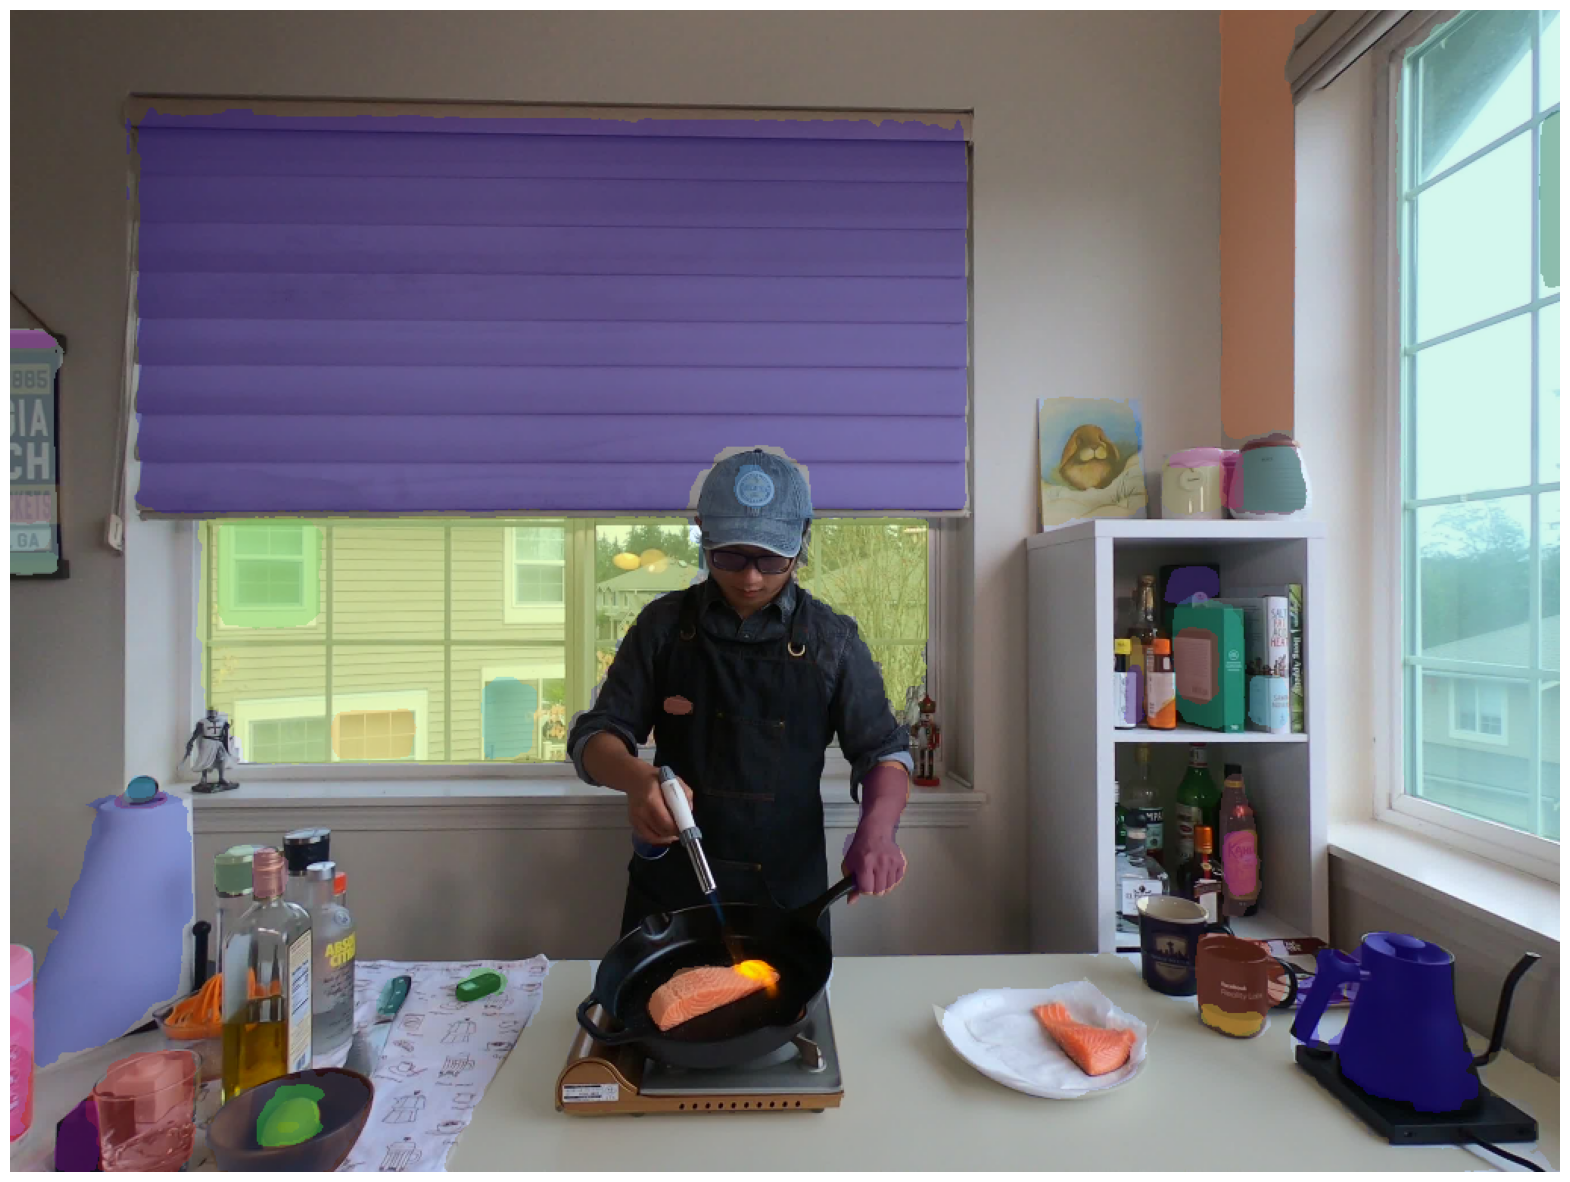

In [2]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 